# The Perceptron Algorithm

##### Made by: Victor Nascimento Ribeiro -   07/2022

In [2]:
def show_graph(x,w,line):
    plt.figure(figsize=(10, 5))
    plt.title("w = (%.1f , %.1f , %.1f)" % (w[0], w[1], w[2]))
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.xticks(np.arange(-10, 11, 2)) 
    plt.ylim((-10, 10))
    plt.ylim((-5, 5))
    plt.yticks(np.arange(-5, 6)) 
    
    
    # calculate the predicted result
    y_target = np.sign(np.dot(x,w))
    errado = np.array([y != y_target])
    certo = np.array([y == y_target])
    
    plt.scatter(x[certo[0],1],x[certo[0],2], c=y[certo[0]], marker='o', cmap='bwr')
    plt.scatter(x[errado[0],1],x[errado[0],2], c=y[errado[0]], marker='x', cmap='bwr')
        
        
    if line == True:
        # transform w1x + w2y + w0 = 0 to the form y = -(w1/w2)x - w0/w2
        # plot the line
        a = -w[1] / w[2]
        b = -w[0] / w[2]
        x_line = np.arange(-10, 10, 0.50)
        y_line = a*x_line + b
        plt.plot(x_line, y_line)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Creating a random training set

- Our training set consist in N radom points in $[-10, 10] \times [-5, 5] \subseteq R^2$ region

- Let us fix a function $f(x_1,x_2) = w_0 + w_1\,x_1 + w_2\,x_2$

- Let us also plot a graph of the examples (<font color="red">positives</font> and <font color="blue">negatives</font>).

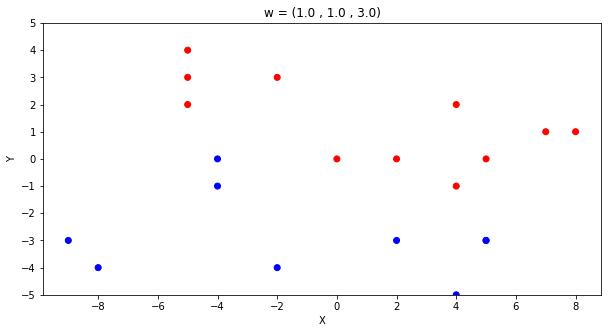

In [3]:
N = 20
x = np.concatenate(([np.ones(N)],[np.random.randint(-10,10,N)],[np.random.randint(-5,5,N)]), axis=0)
x = np.transpose(x)

w_target = np.array([1,1,3]) # this values can be random
y = np.sign(np.dot(x, w_target))

        
show_graph(x,w_target,line=False)

## How works

#### input: $\normalsize x = (x_1, x_2, ... , x_d) , \; x \in R^d$

#### output: $\normalsize y \in $ {<span style="color:red">-1</span>$ , $<span style="color:blue">+1</span>}

#### Hipothesis: $\normalsize h(x) = sign\Big\{ (\sum_{i = 1}^{d} w_ix_i) + b) \Big\} , \;b \in R, \;w_i \in R,  \;i = 1,2,...,d$

<br />

#### Artificial component, just to simplify notatiton:
$\normalsize x = (\mathbf{1}, x_1, x_2, ... , x_d) , \;x \in R^{d+1}$

$\normalsize w = (\mathbf{w_0}, w_1, w_2, ... , w_d), \;w \in R^{d+1}$

#### Thus
$\normalsize h(x) = sign(w^{T}x)$

$\normalsize sign(w^{T}x)$ defines a hyperplane

<br />


## The pereptron implements

- Given the training set:
$(x_1,y_1) , (x_2,y_2) , ... , (x_d,y_d)$ 

- Pick a <span style="color:red">misclassified</span> point:
$sign(w^{T}x_d) \neq y_d$
- Update the weight vector: <span style="color:blue">w</span> $\leftarrow$ <span style="color:red">w</span> $+ y_dx_d$

<br />

## Understanding the graph

let's represent the points of the graph in two colors: <span style="color:red">positive</span> and <span style="color:blue">negative</span>

To tell if the points were classified correctly we will use:<br>
- o : corretly classified by the hypothesis<br>
- x : wrongly classified by the hypothesis<br>

<br />

## The algorithm

In [4]:
def perceptron(x, y, w):
    show_graph(x, w, line=True)

    n = 0 # number of correct points
    qt = 0 # numbers of iterations
    i = 0 
    
    # while there are misclassified points
    while n <= N:
        h = np.dot(x[i], w)
        # if the point is misclassified
        if(np.sign(h) != y[i]):
            # Calculate the new w
            w = w + y[i] * x[i]
            
            show_graph(x, w, line=True)

            qt += 1
            n = 0
        
        # go to the next point
        i = (i + 1) % N
        n += 1
        

    return w, qt

Initial weight vector:
(9,1,3)

Final weight vector:
(9,4,13)

12 Perceptrons


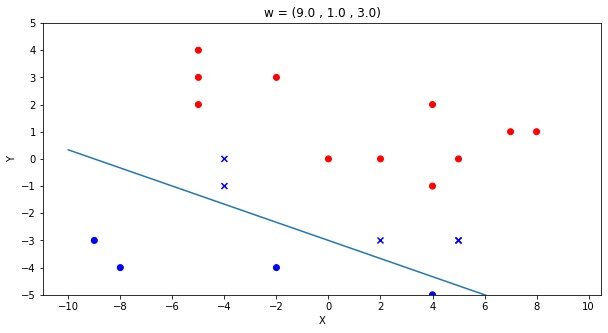

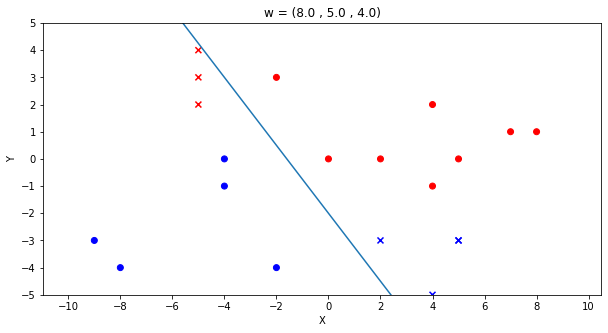

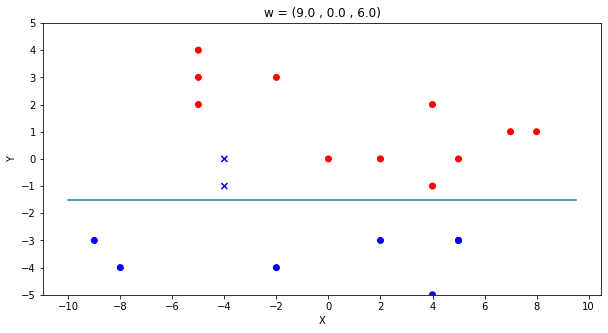

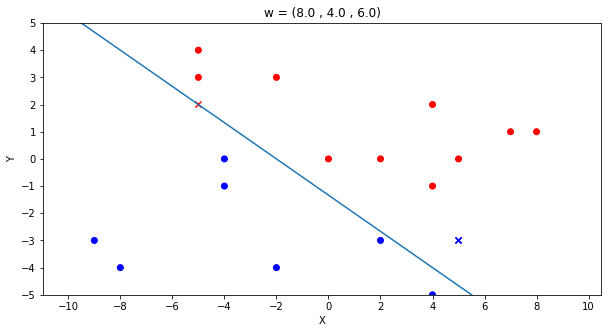

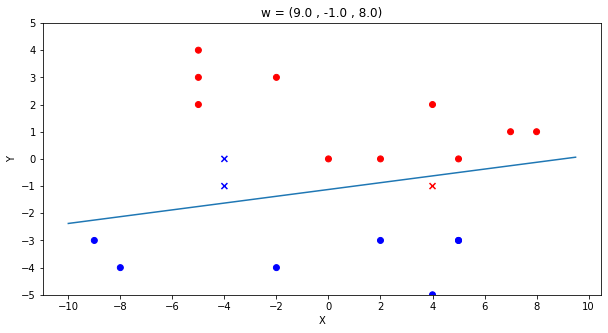

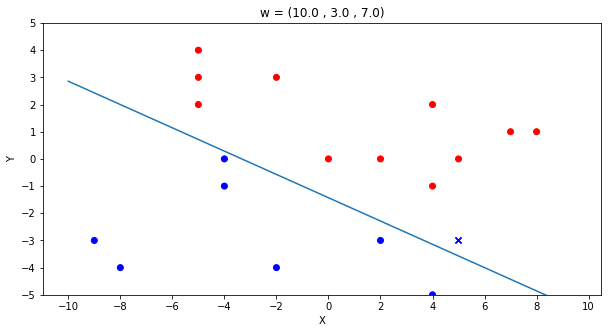

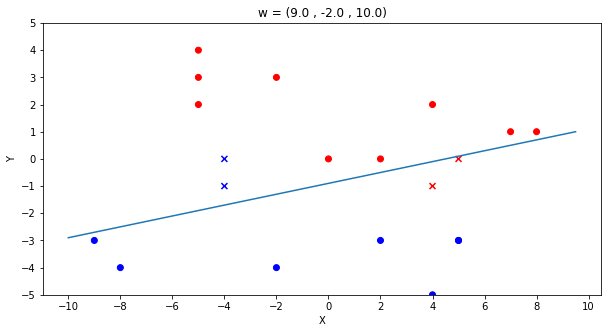

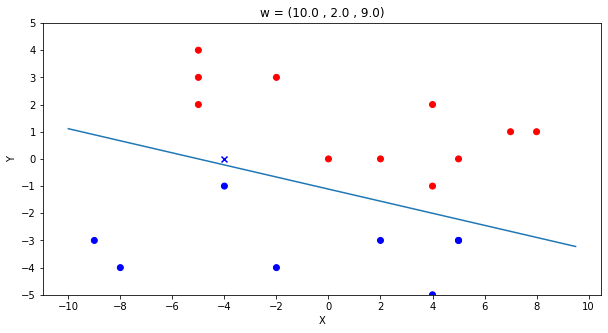

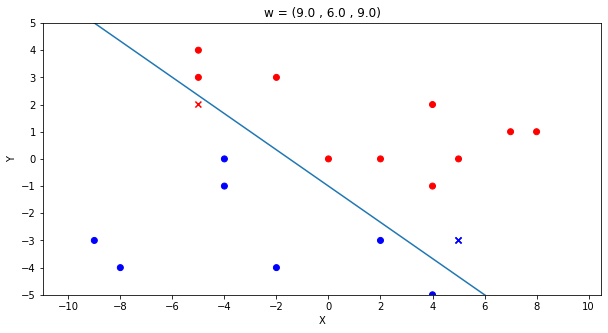

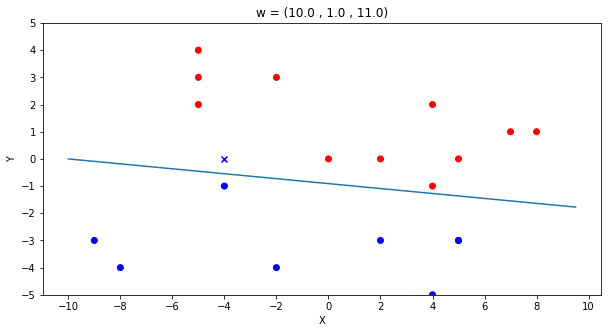

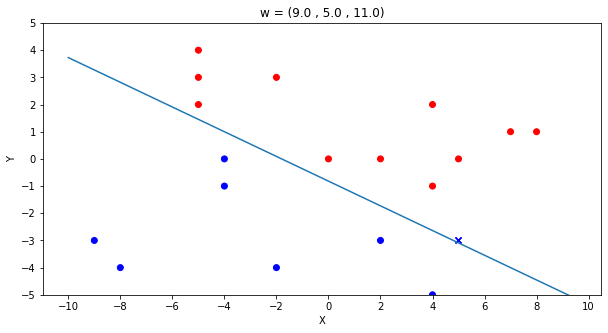

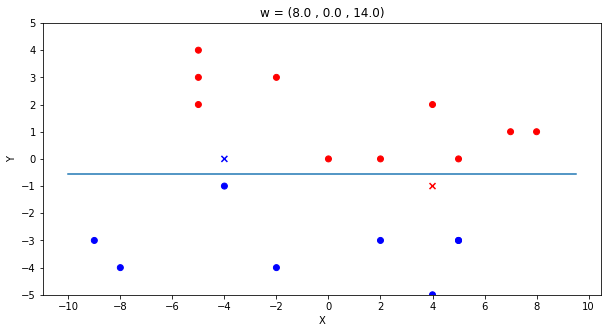

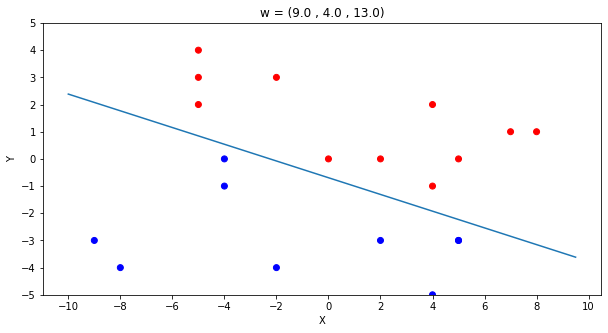

In [5]:
w_start = np.array([np.random.randint(-10,10),np.random.randint(-10,10),np.random.randint(-10,10)]) 
print("Initial weight vector:")
print("(%.f,%.f,%.f)" % (w_start[0],w_start[1],w_start[2]))

w, qt = perceptron(x, y, w_start)

print()
print("Final weight vector:")
print("(%.f,%.f,%.f)" % (w[0],w[1],w[2]))

print()
print(qt, "Perceptrons")

### References

- https://work.caltech.edu/telecourse (lecture 1)
- Abu-Mostafa, Yaser S., Magdon-Ismail, Malik and Lin, Hsuan-Tien. Learning From Data. : AMLBook, 2012.